# WDF Efficiency for CBC at uniformly distributed SNR


We check the trigger efficiency for WDF at different signal-to-noise ratios for compact binary mergers added to a gaussian background colored with detector noise.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import h5py
import matplotlib
import pylab

matplotlib.rcParams['agg.path.chunksize'] = 10000 # Otherwise Overflow plotting too many points
enable_interactive = True
if enable_interactive==True:
    %matplotlib notebook

Check and select folder with data:

In [40]:
#ls /data/dev/ml/cwb_vs_wdf/data/cbc_uniformSNR_v2/
#ls /data/dev/ml/cwb_vs_wdf/data/cbc_uniformSNR_v2/splitted_thresh3.0/cbc_0/whitening_parameters/

In [41]:
wdf_threshold = 3
no_dct=True
    
if no_dct==True:
    path = '/data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/splitted_cbc_cbc_uniformedSNR_v2/'
    csv_name = 'WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR3.csv' 
#path = '/data/dev/ml/cwb_vs_wdf/data/cbc_uniformSNR/splitted/cbc_'
else:
    if wdf_threshold==2:
        path = '/data/dev/ml/cwb_vs_wdf/data/cbc_uniformSNR_v2/splitted/cbc_'
        csv_name = 'WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR2.csv' 
    else:
        path = '/data/dev/ml/cwb_vs_wdf/data/cbc_uniformSNR_v2/splitted_thresh'+str(wdf_threshold)+'.0/cbc_'
        csv_name = 'WDFTrigger-strain-GPS0-AR4000-Win1024-Ov2-SNR'+ str(wdf_threshold)+'.csv' 
    
#/data/dev/ml/cwb_vs_wdf/data/

In [42]:
ls /data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/splitted_cbc_cbc_uniformedSNR_v2/part_0/

cbc_uniformedSNR_v2.h5  cbc_uniformedSNR_v2_white.h5  wp/


In [43]:
df_total = pd.DataFrame()

In [45]:
glob.glob('cbc_uniformSNR_triggers_v2.*'), os.listdir()

([],
 ['.ipynb_checkpoints',
  'WDF_cbc_snr_efficiency.ipynb',
  'cbc_uniformSNR_triggers.csv',
  'cbc_uniformSNR_v2_triggers.csv',
  'plots',
  'WDF_cbc_reconstruction.ipynb',
  'cbc_uniformSNR_v4_triggers.csv',
  'cbc_uniformSNR_v5_triggers.csv',
  'cbc_uniformSNR_v6_triggers.csv',
  'cbc_uniformSNR_v3_triggers.csv',
  'cbc_uniformSNR_v7_triggers.csv',
  'WDF_ROC_curve.ipynb',
  'WDF_cbc_snr_efficiency_updated.ipynb'])

In [46]:
seconds_per_file = 300 # 7200 in case of the 40hr dataset
trigger_file = glob.glob('cbc_uniformSNR_triggers.csv')[0]
trigger_file = 'cbc_uniformSNR_v'+str(wdf_threshold)+'_triggers.csv'

In [50]:
os.listdir(), path

(['.ipynb_checkpoints',
  'WDF_cbc_snr_efficiency.ipynb',
  'cbc_uniformSNR_triggers.csv',
  'cbc_uniformSNR_v2_triggers.csv',
  'plots',
  'WDF_cbc_reconstruction.ipynb',
  'cbc_uniformSNR_v4_triggers.csv',
  'cbc_uniformSNR_v5_triggers.csv',
  'cbc_uniformSNR_v6_triggers.csv',
  'cbc_uniformSNR_v3_triggers.csv',
  'cbc_uniformSNR_v7_triggers.csv',
  'WDF_ROC_curve.ipynb',
  'WDF_cbc_snr_efficiency_updated.ipynb'],
 '/data/dev/ml/cwb_vs_wdf/data/no_dct/cbc/splitted_cbc_cbc_uniformedSNR_v2/')

In [33]:
if trigger_file not in os.listdir():

    for i in range(51):
        path_to_file = path + str(i) + "/wp/"
        if 2>1:
    #    try:
            df = pd.read_csv(path_to_file + csv_name)
            df["gps"] = df["gps"] + 350 + seconds_per_file*i
            df_total = df_total.append(df)
            print('Read file ', str(i))
        else:
    #    except:
            print('Error')
            continue

    df_total.to_csv('./'+trigger_file) 

else:
    print('.csv trigger file already exists.')
    df_total = pd.read_csv('./'+trigger_file)

.csv trigger file already exists.


In [1]:
ls -lt ./

total 1401672
-rw-r--r-- 1 iess roma2    105917 Apr 14 18:07 WDF_ROC_curve.ipynb
-rw-r--r-- 1 iess roma2   2494558 Apr 14 17:56 WDF_cbc_reconstruction.ipynb
-rw-r--r-- 1 iess roma2     85486 Apr 14 17:42 mfsnr_vs_WDFsnr.csv
drwxrwxrwx 2 iess roma2       169 Apr 13 17:54 plots/
-rw-r--r-- 1 iess roma2    514285 Apr 13 17:00 WDF_cbc_snr_efficiency.ipynb
-rw-r--r-- 1 iess roma2    514309 Mar 18 16:22 WDF_cbc_snr_efficiency_updated.ipynb
-rw-r--r-- 1 iess roma2  41221595 May  8  2020 cbc_uniformSNR_v7_triggers.csv
-rw-r--r-- 1 iess roma2  60784300 May  8  2020 cbc_uniformSNR_v3_triggers.csv
-rw-r--r-- 1 iess roma2  43137887 May  7  2020 cbc_uniformSNR_v6_triggers.csv
-rw-r--r-- 1 iess roma2  45424442 May  7  2020 cbc_uniformSNR_v5_triggers.csv
-rw-r--r-- 1 iess roma2  48354964 May  7  2020 cbc_uniformSNR_v4_triggers.csv
-rw-r--r-- 1 iess roma2 393216470 Apr 16  2020 cbc_uniformSNR_v2_triggers.csv
-rw-r--r-- 1 iess roma2 799438489 Apr 14  2020 cbc_uniformSNR_triggers.csv


In [35]:
df_total

Unnamed: 0            gps        snr     snrMax   freq  freqMax  \
0              0     350.000000  23.077812  33.941152   96.0    100.0   
1              1     353.249512   3.104044  37.389637  348.0    364.0   
2              2     364.000000   3.236450  27.698794   88.0     92.0   
3              3     485.748535   3.070886  16.445644    8.0     12.0   
4              4     551.000000   5.309976  29.565101   76.0     80.0   
...          ...            ...        ...        ...    ...      ...   
2680          63  180250.748535   9.044623  19.302878   32.0     36.0   
2681          64  180251.000000  54.085683  33.623583   92.0     96.0   
2682           0  180350.000000  31.343176  35.063647   96.0    100.0   
2683           1  180350.748535  70.285890  30.358181   96.0    100.0   
2684           2  180467.748535   3.255986  28.779139    8.0     12.0   

      duration         wave           rw0           rw1  ...        rw1014  \
0     0.002197  BsplineC309 -7.673468e-21 -1.167925e-20  ...  3.113066e-22   
1     0.099121  BsplineC309  5.529226e-25  5.704757e-25  ...  3.924763e-25   
2     0.180908  BsplineC309  2.405904e-25 -2.405904e-25  ...  4.949019e-24   
3     0.002197  BsplineC309  2.978726e-23  2.987800e-23  ...  2.479671e-23   
4     0.008301  BsplineC309  2.258761e-22  2.838818e-22  ... -9.142938e-23   
...        ...          ...           ...           ...  ...           ...   
2680  0.052246  BsplineC309 -3.426720e-22 -3.141050e-22  ... -5.427752e-22   
2681  0.008789  BsplineC206 -6.724588e-22 -6.842608e-22  ... -5.544392e-22   
2682  0.249756  BsplineC309  1.444915e-20  2.099934e-20  ... -4.356304e-22   
2683  0.009033  BsplineC309 -2.051700e-22 -2.087651e-22  ... -2.036614e-22   
2684  0.123535  BsplineC309 -6.572422e-24 -7.985122e-24  ...  7.694785e-24   

            rw1015        rw1016        rw1017        rw1018        rw1019  \
0    -2.823042e-23 -4.297198e-22 -8.931616e-22 -1.245522e-21 -1.486801e-21   
1     4.072867e-25  4.223714e-25  4.377304e-25  4.533636e-25  4.692711e-25   
2     4.486635e-24  4.022370e-24  3.556227e-24  3.088203e-24  2.618300e-24   
3     2.562984e-23  2.638873e-23  2.707339e-23  2.768380e-23  2.821998e-23   
4    -8.119669e-23 -6.618670e-23 -4.639941e-23 -2.183482e-23  7.507081e-24   
...            ...           ...           ...           ...           ...   
2680 -5.297658e-22 -5.152007e-22 -4.990797e-22 -4.814031e-22 -4.621706e-22   
2681 -5.662412e-22 -5.780431e-22 -5.898451e-22 -6.016471e-22 -6.134490e-22   
2682 -3.826605e-22 -3.091893e-22 -2.152168e-22  1.488953e-22  7.831470e-22   
2683 -2.009942e-22 -1.989533e-22 -1.975386e-22 -1.967501e-22 -1.965878e-22   
2684  6.256592e-24  4.820949e-24  3.387855e-24  1.957310e-24  5.293149e-25   

            rw1020        rw1021        rw1022        rw1023  
0    -1.616998e-21 -1.636114e-21 -2.651897e-21 -4.664349e-21  
1     4.854529e-25  5.019089e-25  5.186392e-25  5.356438e-25  
2     2.146517e-24  1.672855e-24  1.197313e-24  7.198915e-25  
3     2.868191e-23  2.906961e-23  2.938306e-23  2.962228e-23  
4     4.162628e-23  8.052278e-23  1.241966e-22  1.726477e-22  
...            ...           ...           ...           ...  
2680 -4.413824e-22 -4.190385e-22 -3.951388e-22 -3.696833e-22  
2681 -6.252510e-22 -6.370529e-22 -6.488549e-22 -6.606569e-22  
2682  1.687538e-21  2.862069e-21  5.380515e-21  9.242876e-21  
2683 -1.970518e-22 -1.981420e-22 -1.998584e-22 -2.022011e-22  
2684 -8.961312e-25 -2.319028e-24 -3.739375e-24 -5.157174e-24  

[2685 rows x 1032 columns]

In [ ]:
plt.figure(), plt.plot(rw0)

In [36]:
np.unique(df_total['wave'])

array(['BsplineC206', 'BsplineC309'], dtype=object)

In [35]:
#print(df.columns.tolist())

In [36]:
datafile =  '/data/dev/ml/cwb_vs_wdf/data/cbc_uniformSNR/cbc_uniformedSNR.h5'
datafile =  '/data/dev/ml/cwb_vs_wdf/data/cbc_uniformSNR_v2/cbc_uniformedSNR.h5'

In [37]:
with h5py.File(datafile, 'r') as h5:
    print(h5.keys())
    strain = np.array(h5['strain'])
    time = np.array(h5['time']).astype('float64')
    fs = 4096#np.array(h5['fs'])[0]    
    meta = np.array(h5['metadata'])
    template = np.array(h5['injection'])    # templates in h5['injection']


<KeysViewHDF5 ['fs', 'injection', 'metadata', 'strain', 'time']>


Parameters are: **M1*, *M2*, *S1z*, *S2z*, *inclination*, *coal_phase*, distance, *R.A.*, *dec*, *polarization*, *M_chirp*, injection time, *matched filter SNR**

[3.6000000e+01 3.0000000e+01 1.6000000e-01 9.9999998e-03 1.9200000e+00
 1.8500000e+00 6.4002795e+02 3.1415927e+00 7.8539819e-01 3.1415927e+00
 2.8585478e+01 1.8446730e+06 4.5041299e+00]


<IPython.core.display.Javascript object>


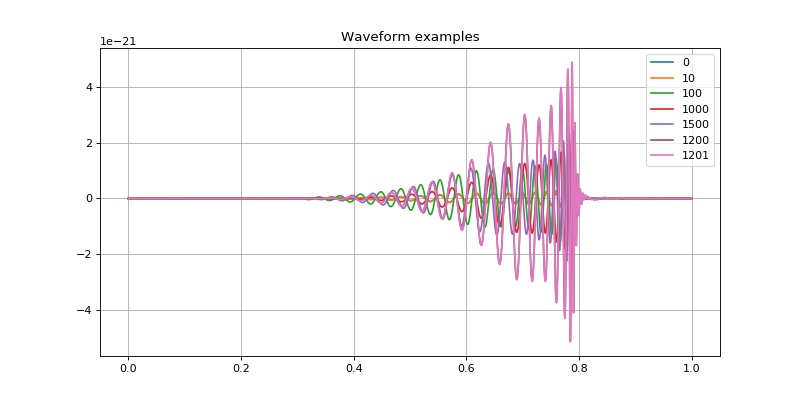

[36. 30.]
[36. 30.]
[36. 30.]
[42. 40.]
[40. 30.]
[42. 40.]
[42. 40.]


In [59]:
custom_choice = [0, 10, 100, 1000, 1500, 1200, 1201]
fs = 4096

print(meta[custom_choice[0]])
plt.figure(figsize=(10,5))
for i in custom_choice:
    plt.plot(np.arange(len(template[i]))/fs, template[i], label=str(i))
    print(meta[i,:2])
plt.grid(), plt.title('Waveform examples'), plt.legend()
plt.show();

<IPython.core.display.Javascript object>


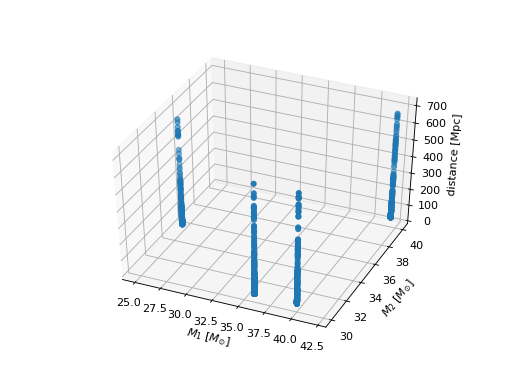

Text(0.5, 0, 'distance [Mpc]')

In [73]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(meta[:,0], meta[:,1], meta[:,6], marker='o')
ax.set_xlabel(r'$M_1$ [$M_{\odot}$]')
ax.set_ylabel(r'$M_2$ [$M_{\odot}$]')
ax.set_zlabel('distance [Mpc]')

In [39]:
# for i in range(len(template)):
#     print(str(i) + '  :  ' + str(meta[i,1]))

In [40]:
#df_total.tail()#, len(template)
#df_total.iloc[150]

In [41]:
df_SNR_sorted = df_total.sort_values('snr')
#df_SNR_sorted.tail(3000)

In [42]:
len_template = len(template[0,:])         # only if all templates have equal length
dt_between_inj = 100
fs = 4096.
count = 0
window = len_template/fs
max_shift = 0.5                     # 0.5 seconds maximum random shift
missed = np.zeros(meta.shape[0])
missed_snr = np.array([])
all_inj_time = np.arange(350,350+len(template)*dt_between_inj, 100)

for ind in range(meta.shape[0]):
    if 2>1:
#    try:
        inj_time = all_inj_time[ind]
       # inj_time = meta[ind][-1]
        if np.any(np.logical_and(df_total['gps']-window-max_shift < inj_time,  inj_time < df_total['gps'])):
            count +=1
            
        else: 
            missed[ind] = ind 
#            missed_snr = np.append(missed_snr, snr_array[ind])
            missed_snr = np.append(missed_snr, meta[ind][-1])
    else:
#   except:
        print('Error.')
print('*** WDF THRESHOLD = ' + str(wdf_threshold) + ' *** \n')
print(str(count) + ' triggers are coincident out of ' + str(meta.shape[0]) )
print("\n Missed triggers: \n \n", np.unique(missed).astype(int))
print("\n Missed triggers SNR: \n \n", (missed_snr).astype('f2'))



1704 triggers are coincident out of 1800

 Missed triggers: 
 
 [   0    1    3    4    6    7    9   11   12   14   17   20   21   22
   23   25   30   31   35   40   41   43  451  452  453  454  456  457
  458  459  460  462  464  466  467  469  471  472  473  474  475  482
  484  485  491  493  494  499  513  901  902  903  904  905  909  911
  912  913  914  915  916  917  918  919  922  923  939  940  941  946
  948 1352 1353 1355 1356 1357 1359 1361 1362 1363 1365 1367 1368 1369
 1371 1372 1373 1374 1375 1376 1381 1382 1387 1388 1398 1400]

 Missed triggers SNR: 
 
 [ 4.504 10.97   5.152 10.586  6.152 11.234  8.68  10.5    7.58   9.79
  8.734  5.07   6.723  6.59  11.734  9.02   8.13   8.03   9.67   7.598
  9.06  12.05   4.895  7.36  10.42   9.07   6.83   7.18   5.86   6.246
 11.79  12.805  7.9    7.26  12.125  7.895  4.613  7.316  4.293  5.543
 12.05  11.336  8.85  10.16  12.39   9.85   9.64  10.09  15.67   6.574
  5.54   8.83  10.125  8.68  11.94   7.516  7.     6.273  6.445  4.

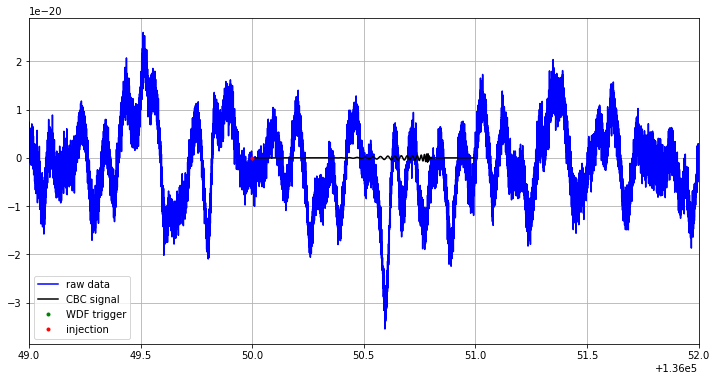

In [47]:
#np.argmax(meta[:,-1]), meta[:,-1]
inj_ex = 1357
ind1, ind2 = int((349+100*inj_ex)*fs), int((352+100*inj_ex)*fs)
mid1, mid2 = int((350+100*inj_ex)*fs), int((351+100*inj_ex)*fs)
plt.figure(figsize=(12,6)), 
plt.plot(np.arange(ind1/fs,ind2/fs, 1/fs), strain[ind1:ind2],'b', label='raw data'),plt.grid()
plt.plot(np.arange(mid1, mid2, 1)/fs, template[inj_ex],'k', label='CBC signal'),
plt.plot(df_total['gps'], np.zeros_like(df_total['gps']), '.g', label='WDF trigger')
plt.plot(all_inj_time, np.zeros_like(all_inj_time), '.r', label='injection'), plt.xlim(ind1/fs,ind2/fs)
plt.legend()
plt.show();
#plt.ylim(0.98, 1.02)

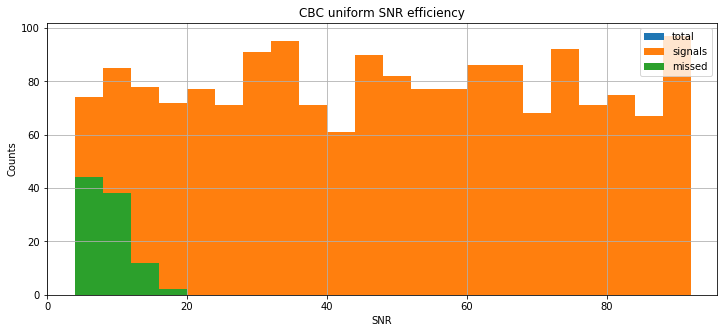

In [44]:
bin_step = 4
binning = np.arange(0,max(meta[:,-1]), bin_step)

plt.figure(figsize=(12,5)), 
plt.hist(meta[:,-1],bins=binning, label='total'), 
plt.hist(meta[:,-1],bins=binning, label='signals'), 
plt.hist(missed_snr, bins=binning, label='missed'), 
plt.xlabel('SNR'), plt.ylabel('Counts'), plt.title('CBC uniform SNR efficiency')
plt.xlim(0,max(meta[:,-1])), plt.grid(), plt.legend();




In [45]:
detection_percentage, avg_snr = np.array([]), np.array([])

for bins in binning[:-1]:
    signals_in_range = np.any(np.logical_and(bins<meta[:,-1], meta[:,-1]<bins+bin_step))
    #print('in range '+str(bins) + ' to ' +str(bins+bin_step) + ': ' + str(signals_in_range))
   
    if signals_in_range==True:
        n_missed = np.count_nonzero(np.logical_and(bins<missed_snr, missed_snr<bins+bin_step))
        total = np.count_nonzero(np.logical_and(bins<meta[:,-1], meta[:,-1]<bins+bin_step))
        detection_percentage = np.append(detection_percentage, 100*(total-n_missed)/total)
        avg_snr = np.append(avg_snr, np.mean(meta[np.logical_and(bins<meta[:,-1], meta[:,-1]<bins+bin_step),-1]))

In [48]:
labels = ['WDF_thr = 2','WDF_thr = 3','WDF_thr = 4','WDF_thr = 5','WDF_thr = 6','WDF_thr = 7']

In [49]:
#avg_snr2, detection_percentage2 = avg_snr, detection_percentage
avg_snr3, detection_percentage3 = avg_snr, detection_percentage

#avg_snr4, detection_percentage4 = avg_snr, detection_percentage
#avg_snr5, detection_percentage5 = avg_snr, detection_percentage
#avg_snr6, detection_percentage6 = avg_snr, detection_percentage
#avg_snr7, detection_percentage7 = avg_snr, detection_percentage

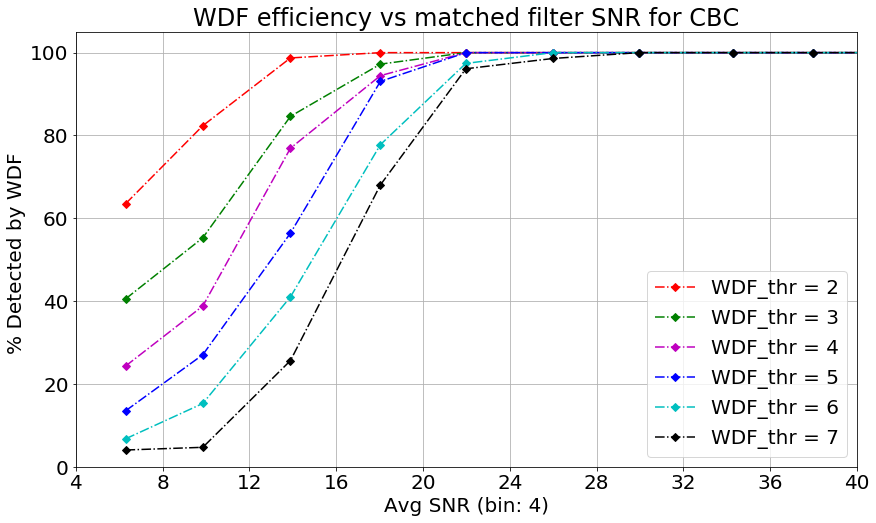

In [264]:
font = {'family' : 'cm',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

plt.figure(figsize=(14,8)), 
#plt.plot(avg_snr, detection_percentage, '-.D', color='r'), plt.grid(), plt.title('WDF efficiency vs matched filter SNR for CBC')
plt.plot(avg_snr2, detection_percentage2, '-.D', color='r',label=labels[0]), plt.grid(), plt.title('WDF efficiency vs matched filter SNR for CBC')
plt.ylim([0,105]), plt.xticks(binning), 
plt.plot(avg_snr3, detection_percentage3, '-.D', color='g',label=labels[1])
plt.plot(avg_snr4, detection_percentage4, '-.D', color='m',label=labels[2])
plt.plot(avg_snr5, detection_percentage5, '-.D', color='b',label=labels[3])
plt.plot(avg_snr6, detection_percentage6, '-.D', color='c',label=labels[4])
plt.plot(avg_snr7, detection_percentage7, '-.D', color='k',label=labels[5])


#plt.plot(avg_snr, detection_percentage, '-.D', color='r')
plt.legend(loc=4), # 4 is lower right
plt.ylabel('% Detected by WDF ', ), plt.xlabel('Avg SNR (bin: '+ str(bin_step) + ')'), plt.xlim(4,40);
#plt.savefig('/users/iess/WDF_vs_cWB/plots/WDF_efficiency_SNR_0_to_40.png')


In [258]:
print('Total triggers at WDF_SNR threshold ' +str(wdf_threshold) +': ' + str(np.shape(df_total)[0]) + 
      '\n Total time [hrs]: ' + str(time[-1]/3600))

Total triggers at WDF_SNR threshold 7: 1819
 Total time [hrs]: 50.15277777777778


In [52]:
#df_SNR_sorted
981/(50.153*3600)

0.005433373875939625

TRIGGERS in 50.153 hrs

WDF_SNR threshold 2: 17474 total, 1757 signals, 15717 background (FAR 0.0870 per sec)
WDF_SNR threshold 3: 2685 total, 1704 signals, 981 background (FAR 0.0054 per sec)
WDF_SNR threshold 4: 2144 total, 1670 signals, 474 background (FAR 0.0026 per sec)
WDF_SNR threshold 5: 2012 total, 1635 signals, 372 background (FAR 0.0020 per sec)
WDF_SNR threshold 6: 1908 total, 1595 signals, 313 background (FAR 0.0017 per sec)
WDF_SNR threshold 7: 1819 total, 1563 signals, 256 background (FAR 0.0014 per sec)

In [266]:
temp_dic =[]

In [274]:
temp_dic.append(
    {
        'WDF_threshold': 7.0,
        'total_triggers': np.shape(df_total)[0],
        'signal_triggers': count,
        'WDF_efficiency':  detection_percentage7,
        'avg_mf_SNR': avg_snr7,
        'FAR': (np.shape(df_total)[0]-count)/(time[-1])
    })

In [275]:
wdf_triggers = pd.DataFrame(temp_dic)

In [279]:
wdf_triggers['FAR']

0    0.0870
1    0.0054
2    0.0026
3    0.0020
4    0.0017
5    0.0014
Name: FAR, dtype: float64

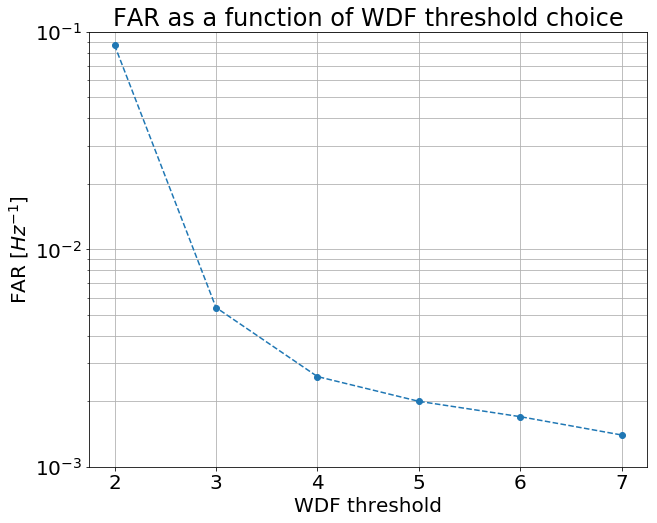

In [296]:
plt.figure(figsize=(10,8)), plt.semilogy(wdf_triggers['WDF_threshold'],wdf_triggers['FAR'], 'o--'), 
plt.grid(which='both'), 
plt.xlabel('WDF threshold'), plt.ylabel(r'FAR [$Hz^{-1}$]'), plt.ylim(1e-3, 1e-1), 
plt.title('FAR as a function of WDF threshold choice');

In [ ]:
plt.figure(figsize=(14,8)), 
#plt.plot(avg_snr, detection_percentage, '-.D', color='r'), plt.grid(), plt.title('WDF efficiency vs matched filter SNR for CBC')
plt.plot(wdf_triggers[], detection_percentage2, '-.D', color='r',label=labels[0]), plt.grid(), plt.title('WDF efficiency vs matched filter SNR for CBC')
plt.ylim([0,105]), plt.xticks(binning), 
plt.plot(avg_snr3, detection_percentage3, '-.D', color='g',label=labels[1])
plt.plot(avg_snr4, detection_percentage4, '-.D', color='m',label=labels[2])
plt.plot(avg_snr5, detection_percentage5, '-.D', color='b',label=labels[3])
plt.plot(avg_snr6, detection_percentage6, '-.D', color='c',label=labels[4])
plt.plot(avg_snr7, detection_percentage7, '-.D', color='k',label=labels[5])


#plt.plot(avg_snr, detection_percentage, '-.D', color='r')
plt.legend(loc=4), # 4 is lower right
plt.ylabel('% Detected by WDF ', ), plt.xlabel('FAR'), plt.xlim(4,40);
#plt.savefig('/users/iess/WDF_vs_cWB/plots/WDF_efficiency_SNR_0_to_40.png')

In [300]:
wdf_triggers['FAR']

0    0.0870
1    0.0054
2    0.0026
3    0.0020
4    0.0017
5    0.0014
Name: FAR, dtype: float64

In [328]:
arr = np.zeros((6,6))
for i in range(6):
    arr[i,:] = np.array([detection_percentage2[i],detection_percentage3[i],
                         detection_percentage4[i],detection_percentage5[i],
                         detection_percentage6[i], detection_percentage7[i]])

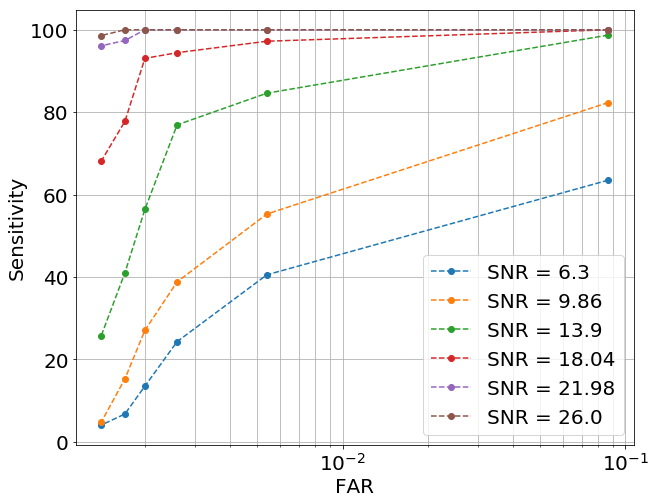

In [339]:
plt.figure(figsize=(10,8)), 
for i in range(6):
    plt.semilogx(wdf_triggers['FAR'], arr[i], 'o--', label='SNR = '+str(np.around(avg_snr[i], 2))), 
plt.grid(which='both')
plt.xlabel('FAR'), plt.ylabel('Sensitivity')

plt.legend();
